# 악성사이트 탐지 머신러닝 모델 개발 (2)

### 목표
 * 웹 페이지에서 Feature 크롤링 연습
 * AI모델을 통해 악성사이트 여부를 판별

### 데이터
* train_0307.csv

|컬럼|설명|
|-|-|
|url_len|URL 길이|
|url_num_hypens_dom|URL내 '-'(하이픈) 개수|
|url_path_len|URL의 경로 길이|
|url_domain_len|URL의 도메인 길이|
|url_host_name|URL의 hostname 길이|
|url_num_dots|URL내 '.'(닷) 개수|
|url_num_underscores|URL내 '_'(언더바) 개수|
|url_query_len|URL쿼리 길이|
|url_num_query_para|URL쿼리의 파라미터 개수|
|url_ip_present|URL내 IP표시 여부|
|url_entropy|URL 복잡도|
|url_chinese_present|URL내 중국어 표기 여부|
|url_port|URL내 포트 표기 여부|
|html_num_tags('iframe')|HTML내 'iframe' 태그 개수|
|html_num_tags('script')|HTML내 'script' 태그 개수|
|html_num_tags('embed')|HTML내 'embed' 태그 개수|
|html_num_tags('object')|HTML내 'object' 태그 개수|
|html_num_tags('div')|HTML내 'div' 태그 개수|
|html_num_tags('head')|HTML내 'head' 태그 개수|
|html_num_tags('body')|HTML내 'body' 태그 개수|
|html_num_tags('form')|HTML내 'form' 태그 개수|
|html_num_tags('a')|HTML내 'a' 태그 개수|
|html_num_tags('applet')|HTML내 'applet' 태그 개수|
|label|악성사이트 여부 컬럼 ('malicious'는 악성사이트, 'benign'은 정상사이트)|

<br>

---

## 4> 데이터 확인

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='muted')

import scipy.stats as spst

In [17]:
data = pd.read_csv('data/train_0307.csv')
data.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

## 5> 데이터 분석

In [19]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

### 5-1> 단변량 분석
- 변수가 내포하고 있는 의미
- 수치형/범주형
- 결측치 확인 및 처리
- 기초 통계량
- 데이터 분포

In [20]:
# 범주형 데이터 타입 변환
categ_cols = ['url_ip_present', 'url_chinese_present', 'url_port']
for col in categ_cols:
    data[col] = data[col].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   int32  
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   int32  
 12  url_port                 3664 non-null   int32  
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [21]:
# 결측치 행 2개 뿐이므로 제거
data.dropna(axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3662 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3662 non-null   float64
 1   url_num_hyphens_dom      3662 non-null   float64
 2   url_path_len             3662 non-null   float64
 3   url_domain_len           3662 non-null   float64
 4   url_hostname_len         3662 non-null   float64
 5   url_num_dots             3662 non-null   float64
 6   url_num_underscores      3662 non-null   float64
 7   url_query_len            3662 non-null   float64
 8   url_num_query_para       3662 non-null   float64
 9   url_ip_present           3662 non-null   int32  
 10  url_entropy              3662 non-null   float64
 11  url_chinese_present      3662 non-null   int32  
 12  url_port                 3662 non-null   int32  
 13  html_num_tags('iframe')  3662 non-null   float64
 14  html_num_tags('script')  3662

,proportion
label,
benign,0.507
malicious,0.493


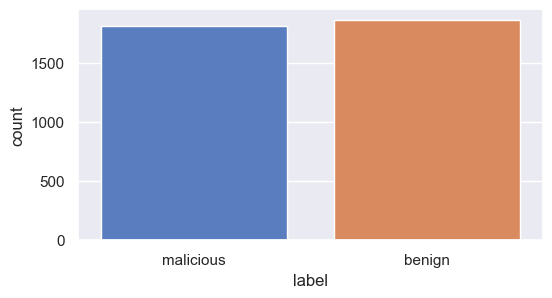

In [5]:
display(data['label'].value_counts(normalize=True).to_frame().round(3))

plt.figure(figsize=(6,3))
sns.countplot(x='label', data=data, hue='label', legend=False)
plt.show()

,proportion
url_ip_present,
0,0.939
1,0.061


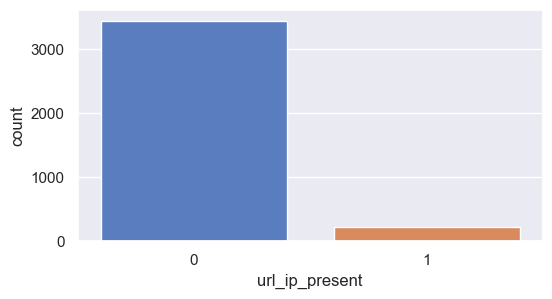

In [6]:
display(data['url_ip_present'].value_counts(normalize=True).to_frame().round(3))

plt.figure(figsize=(6,3))
sns.countplot(x='url_ip_present', data=data, hue='url_ip_present', legend=False)
plt.show()

In [15]:
display(data.loc[data['url_ip_present'] == 0][['url_ip_present', 'label']].value_counts())
display(data.loc[data['url_ip_present'] == 1][['url_ip_present', 'label']].value_counts())

url_ip_present  label    
0               malicious    1731
                benign       1710
Name: count, dtype: int64

url_ip_present  label    
1               benign       148
                malicious     75
Name: count, dtype: int64

In [17]:
data['url_chinese_present'].value_counts(normalize=True).to_frame().round(3)

,proportion
url_chinese_present,
0,1.0


In [18]:
data['url_port'].value_counts(normalize=True).to_frame().round(3)

,proportion
url_port,
0,0.998
1,0.002


In [19]:
display(data.loc[data['url_port'] == 0][['url_port', 'label']].value_counts())
display(data.loc[data['url_port'] == 1][['url_port', 'label']].value_counts())

url_port  label    
0         benign       1853
          malicious    1803
Name: count, dtype: int64

url_port  label    
1         benign       5
          malicious    3
Name: count, dtype: int64

* url_chinese_present는 전부 값이 0 이므로 컬럼을 제거해도 무방함.
* url_port의 값이 1인 비율이 0.2%로 매우 적고 label도 거의 반반이라 컬럼을 제거해도 큰 영향이 없어보임.

In [18]:
def eda_single_numeric(var, describe=True):
    if describe:
        display(data[[var]].describe().T)
    
    plt.subplot(2,1,1)
    sns.histplot(data[var]) # kde=True 오류 주의
    
    plt.subplot(2,1,2)
    sns.boxplot(x=var, data=data)
    plt.grid()
    plt.tight_layout()
    plt.show()

,count,mean,std,min,25%,50%,75%,max
url_len,3664.0,54.559225,82.493265,6.0,24.0,36.0,55.0,1837.0


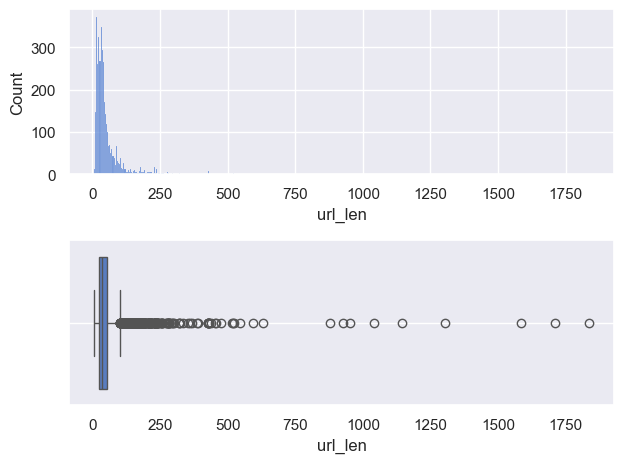

In [19]:
eda_single_numeric('url_len')

,count,mean,std,min,25%,50%,75%,max
url_entropy,3664.0,4.228568,0.393055,2.737839,3.983196,4.189561,4.45894,5.821782


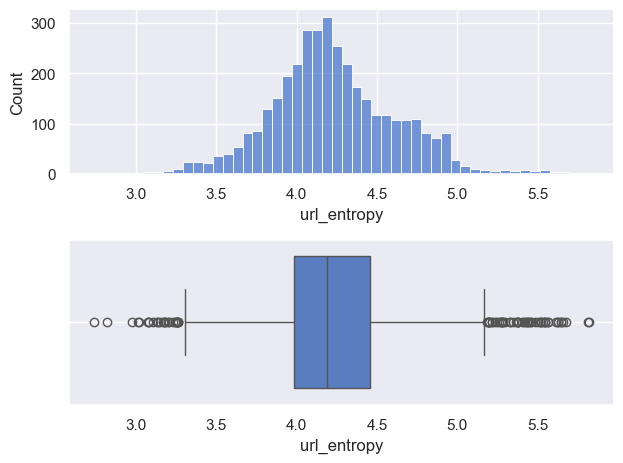

In [49]:
eda_single_numeric('url_entropy')

,count,mean,std,min,25%,50%,75%,max
html_num_tags('script'),3664.0,8.78548,12.647356,0.0,2.0,4.0,12.0,267.0


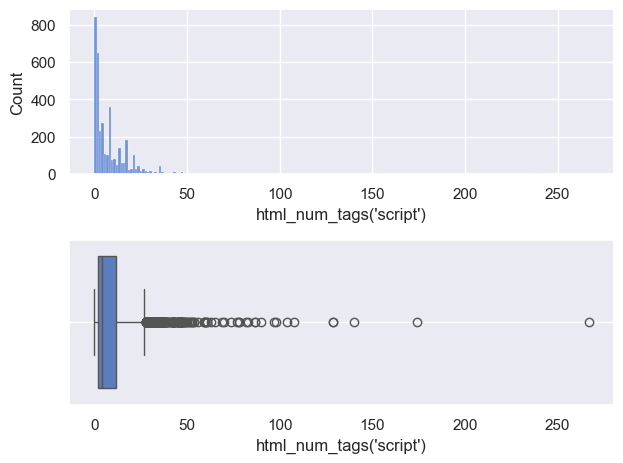

In [53]:
eda_single_numeric("html_num_tags(\'script\')")

In [94]:
data.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

In [5]:
data.fillna(0, inplace=True)

#### 5-1-1> 모든 수치형 데이터의 분포 확인
* url_domain_len, url_hostname_len, url_entropy 3개의 컬럼 외에는 대부분 편향된 데이터를 가지고 있음.
* html_num_tags('applet') 컬럼은 0으로 이루어진 데이터라 무의미함.

In [11]:
data.dtypes.unique()

array([dtype('float64'), dtype('int32'), dtype('O')], dtype=object)

,count,mean,std,min,25%,50%,75%,max
url_len,3664.0,54.559225,82.493265,6.0,24.0,36.0,55.0,1837.0


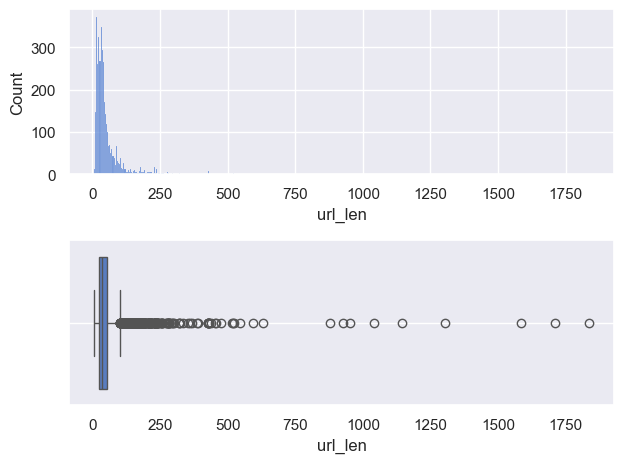

,count,mean,std,min,25%,50%,75%,max
url_num_hyphens_dom,3664.0,0.412937,0.847058,0.0,0.0,0.0,1.0,14.0


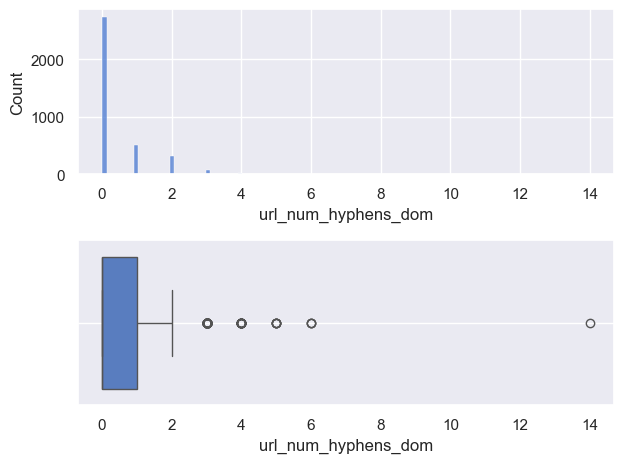

,count,mean,std,min,25%,50%,75%,max
url_path_len,3664.0,29.357806,78.586016,0.0,1.0,13.0,31.0,1816.0


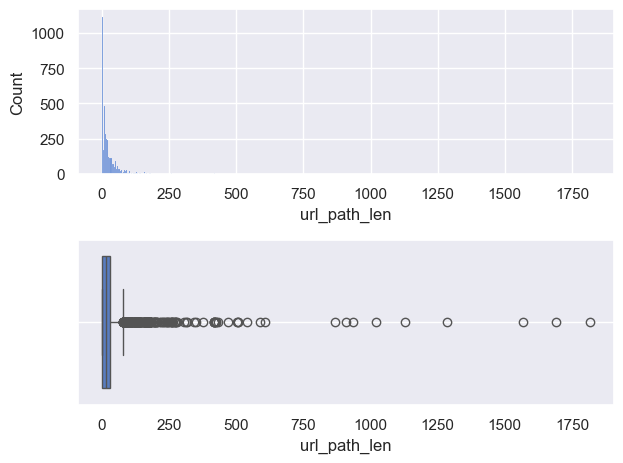

,count,mean,std,min,25%,50%,75%,max
url_domain_len,3664.0,20.377729,9.601609,0.0,14.0,17.0,24.0,109.0


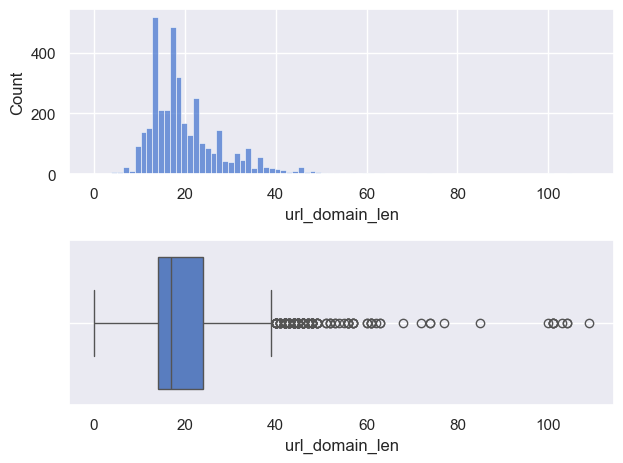

,count,mean,std,min,25%,50%,75%,max
url_hostname_len,3664.0,20.330513,9.628093,4.0,14.0,17.0,24.0,109.0


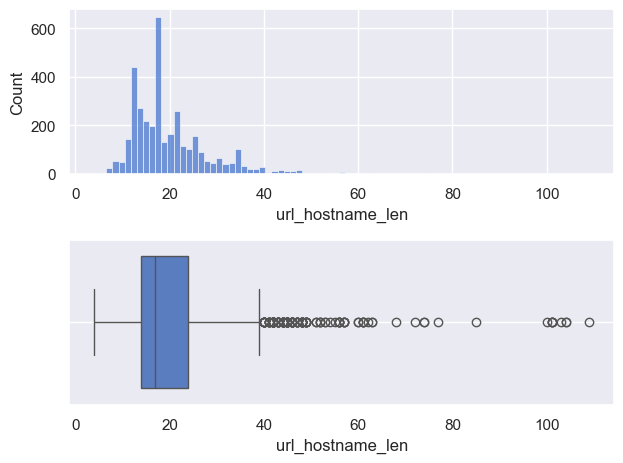

,count,mean,std,min,25%,50%,75%,max
url_num_dots,3664.0,2.516921,1.534119,1.0,2.0,2.0,3.0,32.0


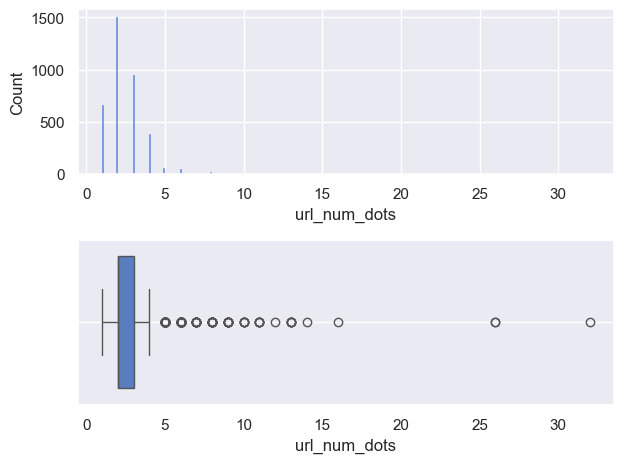

,count,mean,std,min,25%,50%,75%,max
url_num_underscores,3664.0,0.272653,1.124592,0.0,0.0,0.0,0.0,18.0


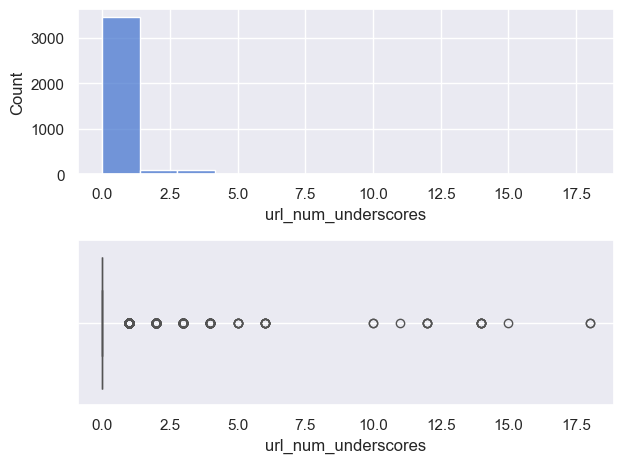

,count,mean,std,min,25%,50%,75%,max
url_query_len,3664.0,4.707697,25.318285,0.0,0.0,0.0,0.0,429.0


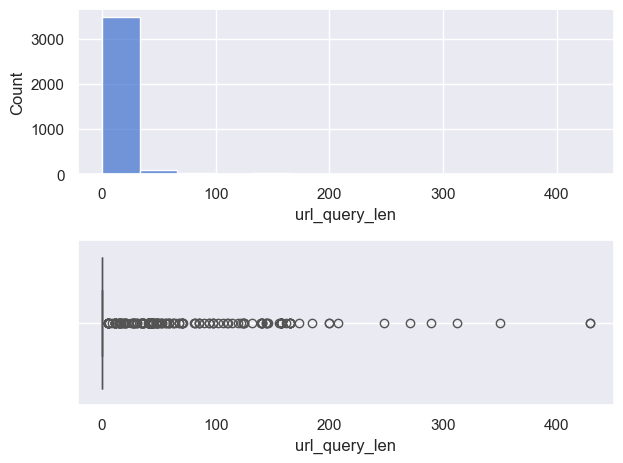

,count,mean,std,min,25%,50%,75%,max
url_num_query_para,3664.0,0.104258,0.57431,0.0,0.0,0.0,0.0,9.0


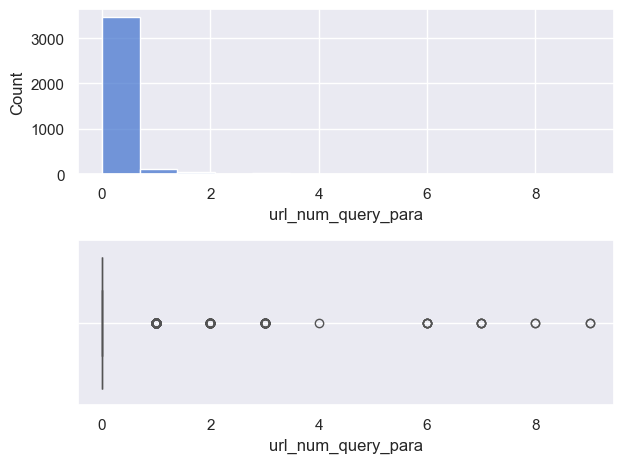

,count,mean,std,min,25%,50%,75%,max
url_entropy,3664.0,4.228568,0.393055,2.737839,3.983196,4.189561,4.45894,5.821782


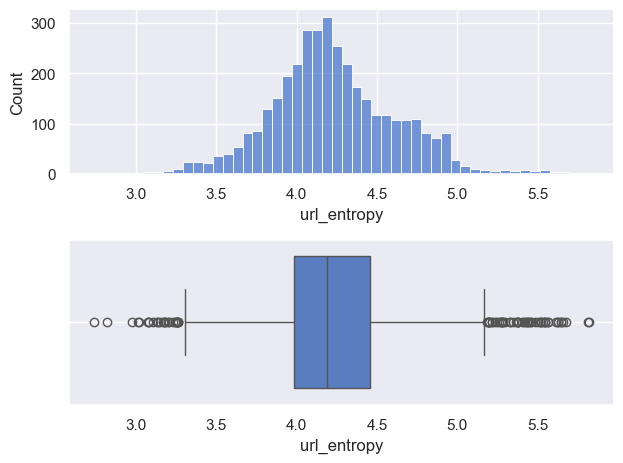

,count,mean,std,min,25%,50%,75%,max
html_num_tags('iframe'),3664.0,0.220797,0.898383,0.0,0.0,0.0,0.0,26.0


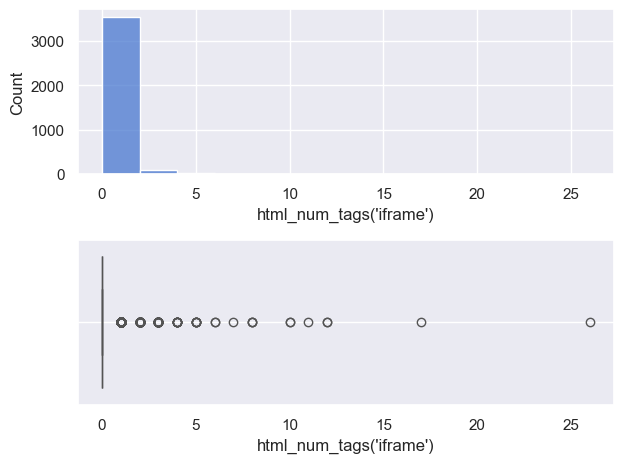

,count,mean,std,min,25%,50%,75%,max
html_num_tags('script'),3664.0,8.78548,12.647356,0.0,2.0,4.0,12.0,267.0


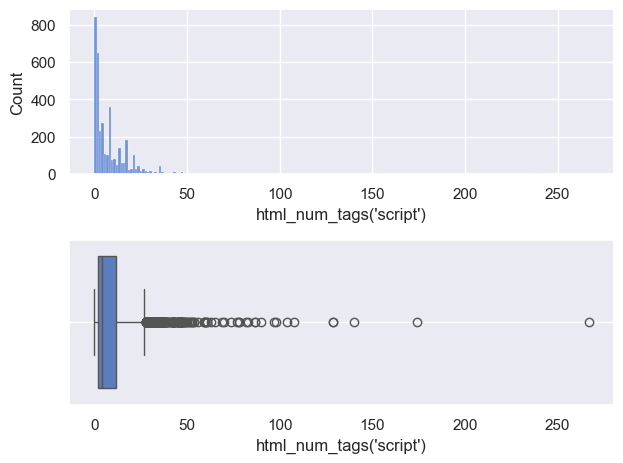

,count,mean,std,min,25%,50%,75%,max
html_num_tags('embed'),3664.0,0.018013,0.144808,0.0,0.0,0.0,0.0,3.0


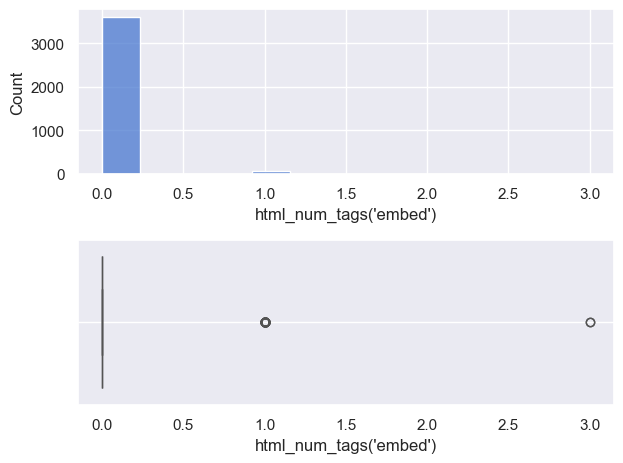

,count,mean,std,min,25%,50%,75%,max
html_num_tags('object'),3664.0,0.02893,0.237682,0.0,0.0,0.0,0.0,8.0


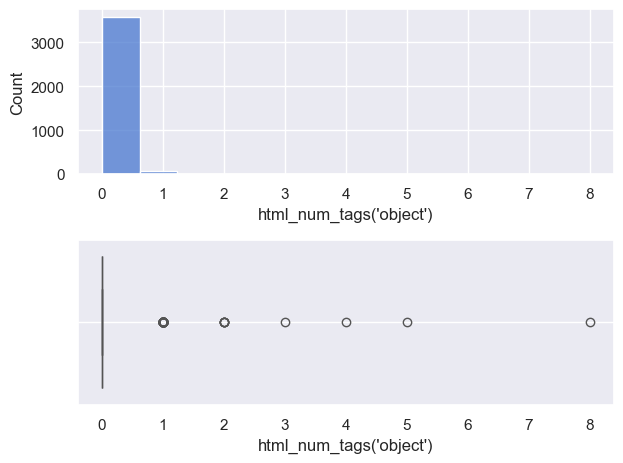

,count,mean,std,min,25%,50%,75%,max
html_num_tags('div'),3664.0,70.843886,365.593304,0.0,6.0,33.0,62.0,19941.0


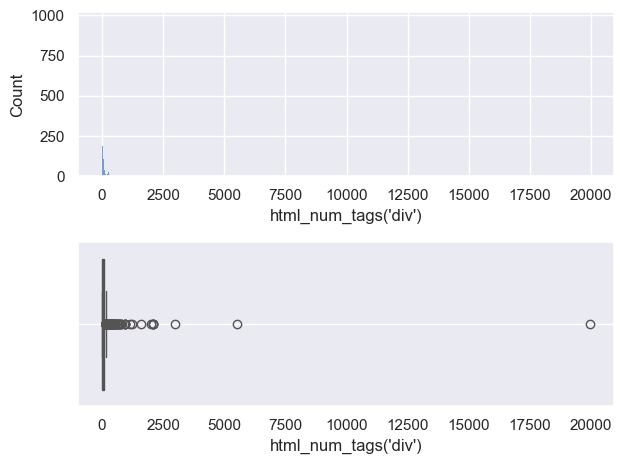

,count,mean,std,min,25%,50%,75%,max
html_num_tags('head'),3664.0,0.99809,0.144974,0.0,1.0,1.0,1.0,3.0


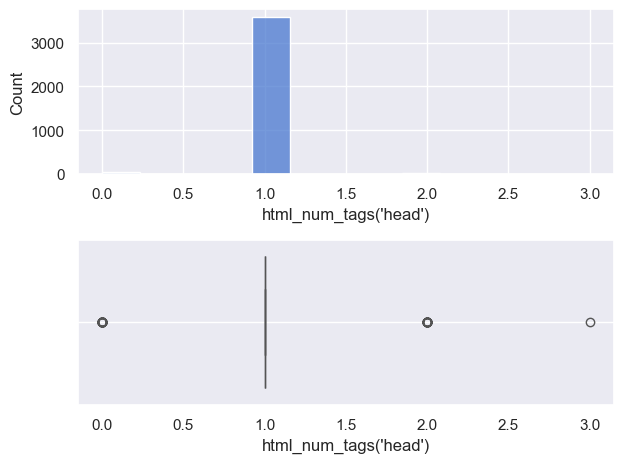

,count,mean,std,min,25%,50%,75%,max
html_num_tags('body'),3664.0,1.016648,0.22533,0.0,1.0,1.0,1.0,3.0


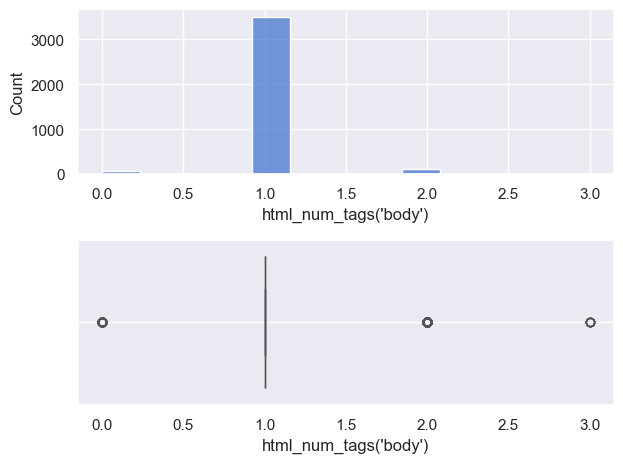

,count,mean,std,min,25%,50%,75%,max
html_num_tags('form'),3664.0,1.02893,1.563903,0.0,0.0,1.0,1.0,57.0


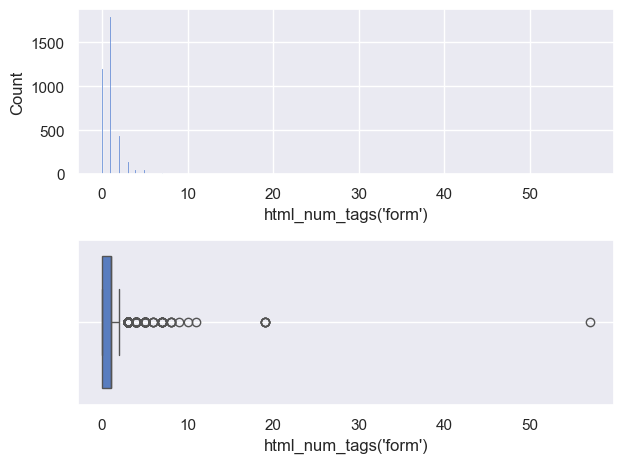

,count,mean,std,min,25%,50%,75%,max
html_num_tags('a'),3664.0,66.18286,342.651459,0.0,2.0,16.0,52.0,13451.0


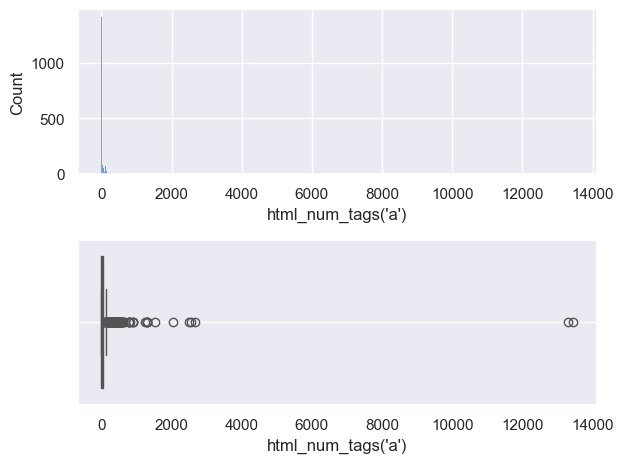

,count,mean,std,min,25%,50%,75%,max
html_num_tags('applet'),3664.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


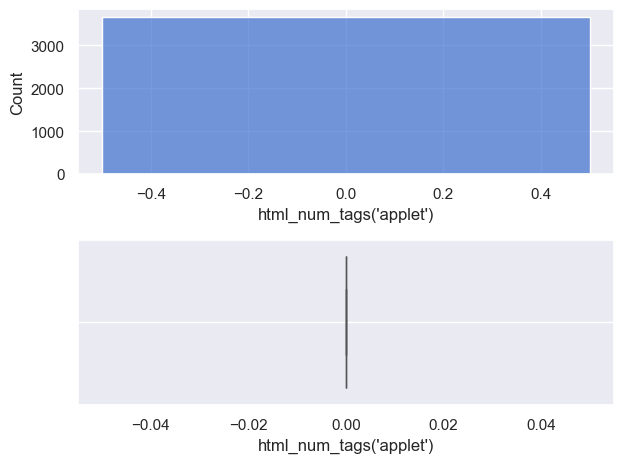

In [24]:
# data.select_dtypes(exclude=['int32', 'object']).columns
num_cols = data.select_dtypes(include=['float64']).columns
for col in num_cols:
    eda_single_numeric(col)

#### 5-1-2> url의 구성과 길이
* url = protocol + domain    + (port)  + path  + query       + fragment
* url _ https:// _ www.~.com _ (:8080) _ /home _ ?search=web _ #section2
<br><br>
* 현재 데이터에서는 domain, path, query 의 길이 데이터만 있음.
<br><br>
* domain, path, query의 **길이 합보다 긴 url은 235개 중 233개가 악성사이트** (2개는 이전에 dropna로 삭제됨)
* 길이에 대한 새 컬럼 생성 후, 종속적인 기존 컬럼 제거

In [24]:
datal = data[['label', 'url_domain_len', 'url_path_len', 'url_query_len', 'url_len']].copy()
datal['p_d_q'] = datal['url_path_len'] + datal['url_domain_len'] + datal['url_query_len']
datal['residual'] = np.where((datal['url_len'] - datal['p_d_q']) > 0,  1, 0)
datal.head()

,label,url_domain_len,url_path_len,url_query_len,url_len,p_d_q,residual
0,malicious,15.0,8.0,0.0,23.0,23.0,0
1,benign,17.0,58.0,0.0,75.0,75.0,0
2,benign,16.0,4.0,0.0,20.0,20.0,0
3,benign,14.0,13.0,0.0,27.0,27.0,0
4,benign,27.0,12.0,0.0,39.0,39.0,0


In [25]:
display(datal.loc[datal['residual'] == 1][['label', 'residual']].value_counts())
display(datal.loc[datal['residual'] == 0][['label', 'residual']].value_counts())

label      residual
malicious  1           233
Name: count, dtype: int64

label      residual
benign     0           1856
malicious  0           1573
Name: count, dtype: int64

In [23]:
data['is_url_length_over'] = np.where((data['url_len']
                                     - (datal['url_path_len'] + datal['url_domain_len'] + datal['url_query_len']))> 0,
                                       1, 0)

display(data.loc[data['is_url_length_over'] == 1][['label', 'is_url_length_over']].value_counts())
display(data.loc[data['is_url_length_over'] == 0][['label', 'is_url_length_over']].value_counts())

label      is_url_length_over
malicious  1                     233
Name: count, dtype: int64

label      is_url_length_over
benign     0                     1856
malicious  0                     1573
Name: count, dtype: int64

In [26]:
# 종속적인 기존 컬럼 제거
data.drop(columns=['url_domain_len', 'url_path_len', 'url_query_len'], axis=1, inplace=True)

### 5-2> 이변량 분석
* 숫자 -> 숫자 : 상관분석 **[산점도]**
* 범주 -> 범주 : 카이제곱검정 **[모자이크 플롯]**
* 범주 -> 숫자 : t검정(범주 2), 분산분석(범주 3+) **[막대그래프]**
* 숫자 -> 범주 : 로지스틱 회귀모형을 통해 회귀계수의 p-value로 검정 **[kdeplot, 히스토그램]**

In [117]:
def eda_num_num(n1, n2, data=data):
    stat, pv = spst.pearsonr(data[n1], data[n2])
    print("corr: %.3f, p-value: %.3f" % (stat, pv))

    plt.scatter(data[n1], data[n2])
    plt.xlabel(n1)
    plt.ylabel(n2)
    plt.show()

def eda_cat_cat(c1, c2, data=data):
    # spst.chisquare : 단변량 카이제곱 검정
    contigency_table = pd.crosstab(data[c1], data[c2])
    stat, pv, _, _ = spst.chi2_contingency(contigency_table) # 자유도, 기대빈도수
    print("Chi square: %.3f, p-value: %.3f" % (stat, pv))

    

def eda_cat_num(c1, n2, data=data):
    cat0, cat1 = data[c1].unique()
    zero = data.loc[data[c1] == cat0, n2]
    one = data.loc[data[c1] == cat1, n2]

    stat, pv = spst.ttest_ind(zero, one)
    print("t-test: %.3f, p-value: %.3f" % (stat, pv))

    sns.barplot(x=c1, y=n2, data=data)
    plt.grid()
    plt.show()

def eda_num_cat(n1, c2):
    sns.histplot(x=n1, data=data, hue=c2)
    plt.show()

In [63]:
target = 'label'

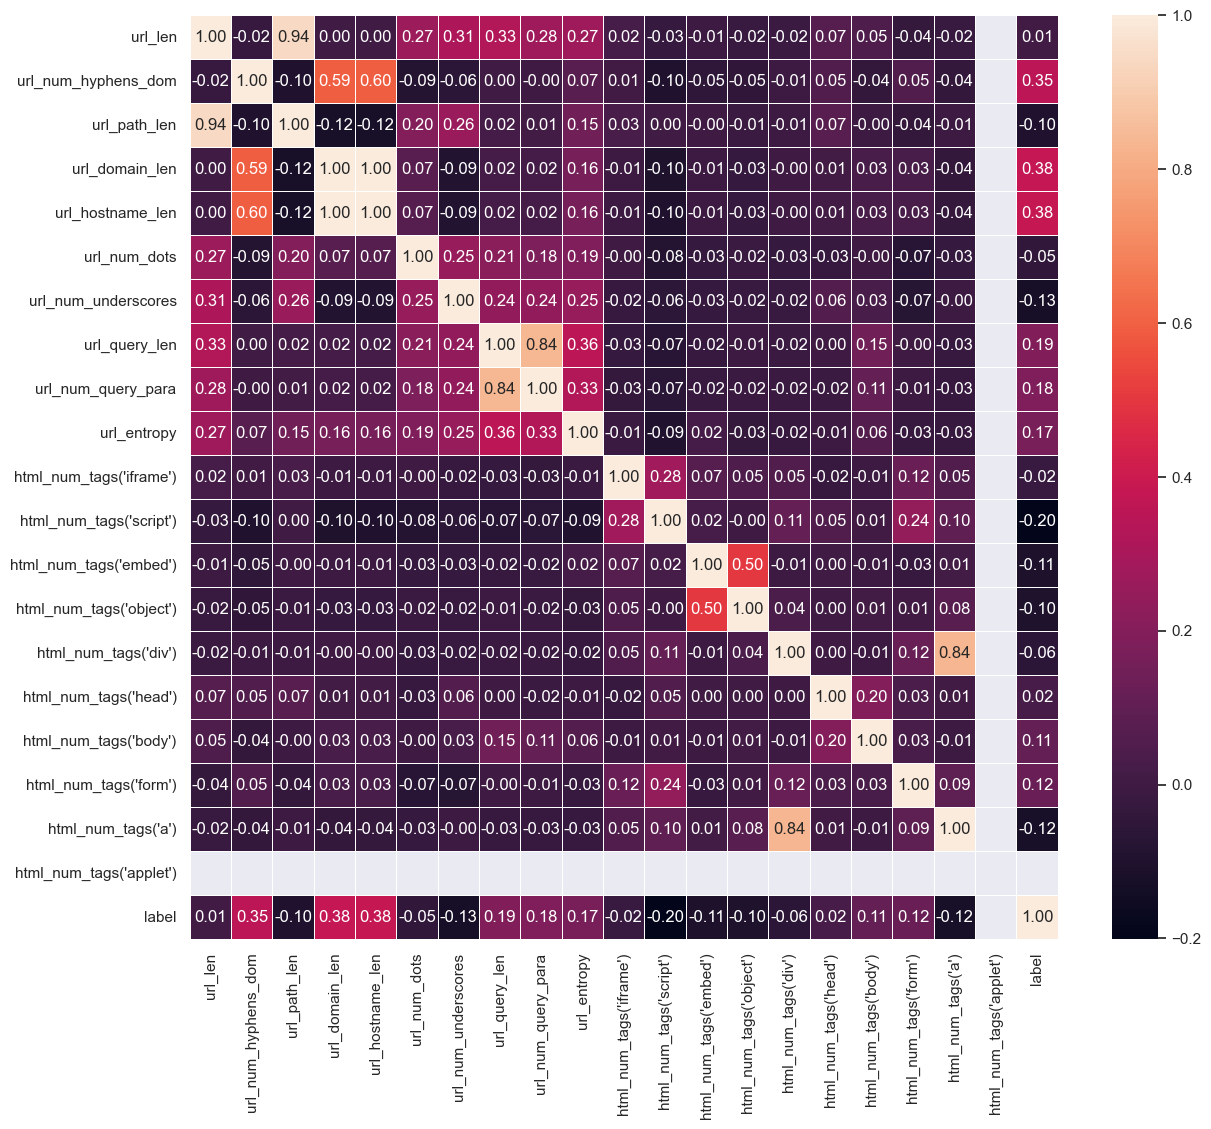

In [28]:
datah = data.select_dtypes(include=['float64', 'object'])
datah['label'] = np.where(datah['label'] == 'malicious', 1, 0)

plt.figure(figsize=(14, 12))
sns.heatmap(datah.corr(),
            annot=True,
            fmt='.2f',
            cbar=True,
            linewidths=0.5)
plt.show()

**label과의 상관관계**
* 0.35+ : url_num_hyphens_dom, url_domain_len, url_hostname_len
* 0.17+ : url_query_len, url_num_query_para, url_entropy
* 0.11+ : html_num_tags(\'body\'), html_num_tags(\'form\')

#### 1. 수치형 - 수치형
* url 길이와 url 내 엔트로피는 약한 상관관계를 가진다.

corr: 0.272, p-value: 0.000


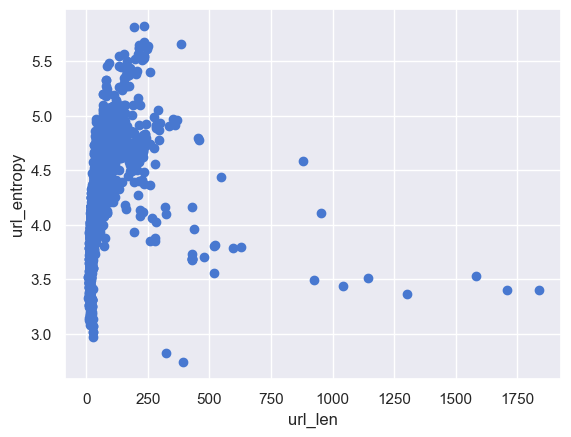

In [ ]:
eda_num_num('url_len', 'url_entropy')

#### 2. 범주형 - 범주형
* url 내 ip 존재 여부와 사이트의 악성 여부 사이에 유의한 연관성이 있다.
<br><br>
* url 내 포트 존재 여부와 사이트의 악성 여부는 서로 독립적이다.

In [92]:
eda_cat_cat('url_ip_present', 'label')

Chi square: 22.629, p-value: 0.000


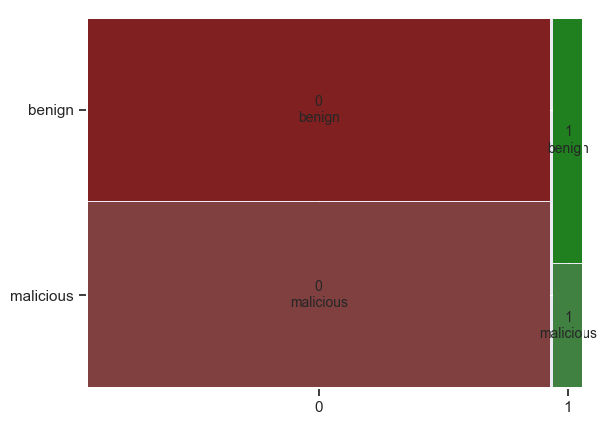

In [102]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(data, ['url_ip_present', target])
plt.show()

In [93]:
eda_cat_cat('url_port', target)

Chi square: 0.098, p-value: 0.754


#### 3. 범주형 - 수치형
* 악성사이트일수록 html 내 script 태그 수가 적다.

t-test: -12.418, p-value: 0.000


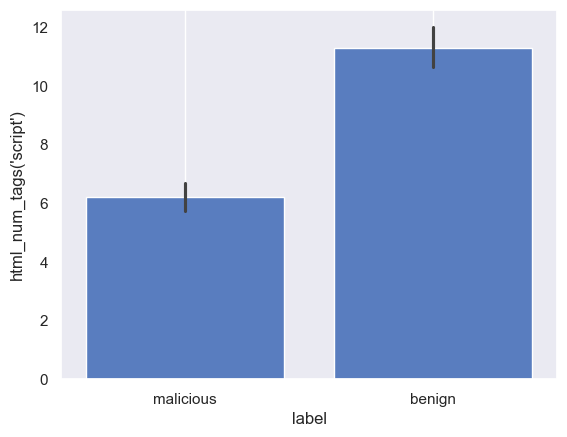

In [99]:
eda_cat_num(target, "html_num_tags(\'script\')")

#### 4. 수치형 - 범주형
* 상대적으로 url 내 도메인 길이가 짧을수록 정상 사이트이다.

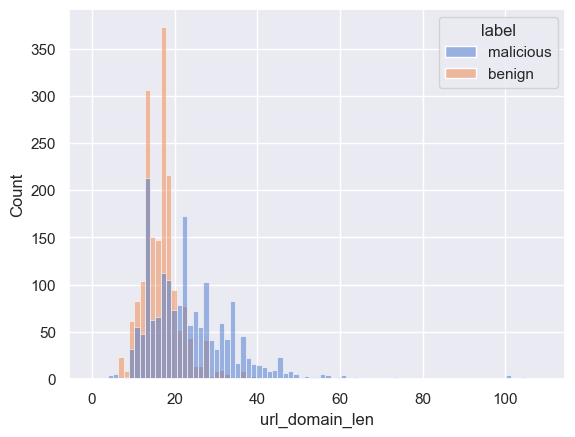

In [118]:
eda_num_cat('url_domain_len', target)

## 6> 데이터 전처리
* 중복 데이터 제거
* tml_num_tags('applte') 컬럼 삭제
* 범주형 데이터 변환
* train-test 분리
* ~~정규화~~ (모델링 과정에서 정규화 전/후 비교)

In [28]:
data2 = data.drop_duplicates()
data2 = data2.drop(columns=["html_num_tags('applet')"], axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3231 entries, 0 to 3663
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3231 non-null   float64
 1   url_num_hyphens_dom      3231 non-null   float64
 2   url_hostname_len         3231 non-null   float64
 3   url_num_dots             3231 non-null   float64
 4   url_num_underscores      3231 non-null   float64
 5   url_num_query_para       3231 non-null   float64
 6   url_ip_present           3231 non-null   int32  
 7   url_entropy              3231 non-null   float64
 8   url_chinese_present      3231 non-null   int32  
 9   url_port                 3231 non-null   int32  
 10  html_num_tags('iframe')  3231 non-null   float64
 11  html_num_tags('script')  3231 non-null   float64
 12  html_num_tags('embed')   3231 non-null   float64
 13  html_num_tags('object')  3231 non-null   float64
 14  html_num_tags('div')     3231

In [29]:
# data2['label'] = np.where(data2['label'] == 'benign', 0, 1) # 원본 데이터 경고
data2.loc[data2['label'] == 'benign', 'label'] = 0
data2.loc[data2['label'] == 'malicious', 'label'] = 1
data2['label'].value_counts()

label
0    1616
1    1615
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

target = 'label'
x = data2.drop(columns=target, axis=1)
y = data2.loc[:, target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [31]:
x_train.to_csv("data/x_train.csv", index=False)
x_test.to_csv("data/x_test.csv", index=False)
y_train.to_csv("data/y_train.csv", index=False)
y_test.to_csv("data/y_test.csv", index=False)